
# Stanford Stats 191 

## Introduction

This is a re-creation of the Stanford Stats 191 course, using Python eco-system tools, instead of R. This is lecture "Logistic: " ( see https://web.stanford.edu/class/stats191/notebooks/Logistic.html )

## Initial Notebook Setup

```watermark``` documents the Python and package environment, ```black``` is my chosen Python formatter

In [180]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [181]:
%reload_ext lab_black

In [182]:
%matplotlib inline

In [183]:
import pandas as pd
import numpy as np
import seaborn as sn

import math

import warnings

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats
from statsmodels.formula.api import logit
from statsmodels.formula.api import probit
from statsmodels.formula.api import glm


import statsmodels.api as sm

import os

----
## Initial Exploration

In order to make sure that I understood the ```statsmodels``` API, I applied the API to the example given in Wikipedia (https://en.wikipedia.org/wiki/Logistic_regression)

We have a dataset that relates hours studied to the PASS / FAIL result in an exam.


Note that the result (dependent variable) is a binary choice, and hence linear regression would not be an appropriate method

In [184]:
Hours = [
    0.50,
    0.75,
    1.00,
    1.25,
    1.50,
    1.75,
    1.75,
    2.00,
    2.25,
    2.50,
    2.75,
    3.00,
    3.25,
    3.50,
    4.0,
    4.25,
    4.50,
    4.75,
    5.00,
    5.50,
]
Pass = [
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
]

Create a ```pandas``` dataframe

In [185]:
exam_dict = {'Hours': Hours, 'Pass': Pass}

exam = pd.DataFrame(exam_dict)

exam.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


Use the ```statsmodels``` formula API to perform Logistic Regression.

In [186]:
res = logit('Pass ~ Hours', data=exam).fit()

res.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.4208
Time:                        18:49:15   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
Hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

Do a quick plot to show the raw data and the results

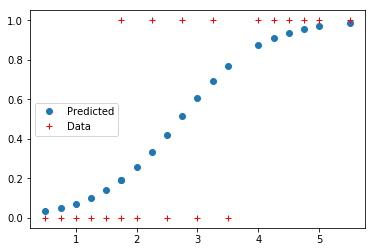

In [187]:
_ = plt.plot(
    exam['Hours'], res.predict(), 'o', label='Predicted'
)
_ = plt.plot(
    exam['Hours'], exam['Pass'], 'r+', label='Data'
)
_ = plt.legend(loc='center left')

Compare the probability of passing for two students (one studied for 2 hours, the latter for 4 hours)

In [188]:
xx = {'Hours': [2, 4]}
xx_df = pd.DataFrame(xx)
res.predict(xx_df)

0    0.255703
1    0.874448
dtype: float64

In [189]:
hours = 2
prob = 1.0 / (
    1.0 + np.exp(-(res.params[0] + res.params[1] * hours))
)
prob

0.25570318264090985

The second variant of the summary function doesn't seem to be much different (?)

In [190]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.421     
Dependent Variable: Pass             AIC:              20.0598   
Date:               2020-05-21 18:49 BIC:              22.0512   
No. Observations:   20               Log-Likelihood:   -8.0299   
Df Model:           1                LL-Null:          -13.863   
Df Residuals:       18               LLR p-value:      0.00063648
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.0777    1.7610  -2.3156  0.0206  -7.5292  -0.6262
Hours          1.5046    0.6287   2.3932  0.0167   0.2724   2.7369
=================================================================

"""

---
### Probit

In order to analyse binary data, and interprete the predictions as probability / odds / likelihood of success or failure, we want a function that ranges from 0 to 1, and has a steep transition, and has tractible mathematical properties.  The usual function is the logistic function, as shown below.

$$f(x) = \frac{L}{1 + e^{-k(x-x_0)}}$$

Some areas of analysis use the Probit function, being the Cumulative Distribution Function (CDF) of the standard normal distribution.

To quote https://tutorials.methodsconsultants.com/posts/what-is-the-difference-between-logit-and-probit-models/

    logistic regression – is more popular in health sciences like epidemiology partly because coefficients can be interpreted in terms of odds ratios. Probit models can be generalized to account for non-constant error variances in more advanced econometric settings (known as heteroskedastic probit models) and hence are used in some contexts by economists and political scientists.

```statsmodels``` supports Probit models

In [191]:
res2 = probit('Pass ~ Hours', data=exam).fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.394887
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                         Probit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.4303
Time:                        18:49:16   Log-Likelihood:                -7.8977
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                 0.0005522
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4728      0.984     -2.514      0.012      -4.401      -0.545
Hours          0.9127      0.351      2.601      0.009       0.225       1.600
==============================================================================
"""

Display the predictions versus actual data

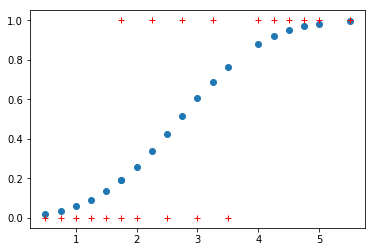

In [192]:
_ = plt.plot(exam['Hours'], res2.predict(), 'o')
_ = plt.plot(exam['Hours'], exam['Pass'], 'r+')

The difference between the Logistic and Probit models for the exam dataset is minimal

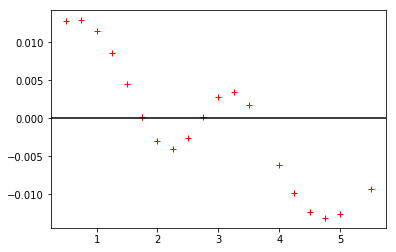

In [193]:
_ = plt.plot(
    exam['Hours'], res.predict() - res2.predict(), 'r+'
)
_ = plt.axhline(0, color='black')

---
## Confidence Intervals

At https://stackoverflow.com/questions/47414842/confidence-interval-of-probability-prediction-from-logistic-regression-statsmode,  there is a very good discussion of Confidence Intervals in the Logit Model.  I was not able to reproduce the results of the R functions used in the lecture notes

###  Approach 1

This is a very mis-guided approach, assuming that the normality of the parameters of our linear model input to the logistic function.  The ```conf-int``` method returns the CI limits for these parameters

In [194]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.4208
Time:                        18:49:16   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
Hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

                  0         1
Intercept -7.529199 -0.626228
Hours      0.272375  2.736916


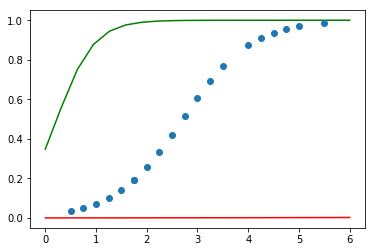

In [195]:
h = np.linspace(0, 6, 20)

ci = res.conf_int(0.05)
print(ci)
lower = ci[0]
upper = ci[1]
prob1 = 1 / (1 + np.exp(-(ci[0][0] + ci[0][1] * h)))
prob2 = 1 / (1 + np.exp(-(ci[1][0] + ci[1][1] * h)))

_ = plt.plot(h, prob1, 'r-')
_ = plt.plot(h, prob2, 'g-')
_ = plt.plot(exam['Hours'], res.predict(), 'o')

As you can see, the results are close to meaningless

---
### Delta Approach

The delta method assumes predicted probabilities are normal

Run the regression again, using the object API

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


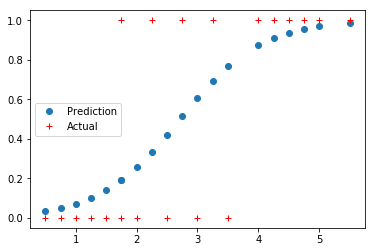

In [196]:
x = np.array(exam['Hours'])
X = sm.add_constant(x)
y = exam['Pass']

model = sm.Logit(y, X).fit()
proba = model.predict(X)

_ = plt.plot(x, proba, 'o', label='Prediction')
_ = plt.plot(x, y, 'r+', label='Actual')
_ = plt.legend(loc='center left')

Code taken from the reference above

In [197]:
# estimate confidence interval for predicted probabilities
cov = model.cov_params()
gradient = (
    proba * (1 - proba) * X.T
).T  # matrix of gradients for each observation
std_errors = np.array(
    [np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient]
)
c = 1.96  # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

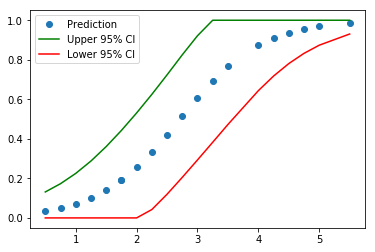

In [198]:
_ = plt.plot(x, proba, 'o', label='Prediction')
_ = plt.plot(x, upper, 'g-', label='Upper 95% CI')
_ = plt.plot(x, lower, 'r-', label='Lower 95% CI')
_ = plt.legend(loc='upper left')

This time the results accord more with my intuition

----
### Bootstrap Approach

In this approach we sample the original dataset with replacement, and get an empirical assessment of the spread in predictions. For each sample, we fit a model, and predict the response.

Some Gotcha-s:

* sampling a small dataset of Logistic regression data can lead to ```PerfectSeparationError``` errors: there is no overlap in Pass / Fail subsets

* we can get Linear Algebra Warnings  (I think a result of our small dataset)

* ```statsmodels``` issues warning about the models we subsequently throw away.  We have to shut these warning off

We throw any bad sample datasets away, and move on.  At the end we use ```numpy``` to get the 95% range of prediction values


976 samples were processed


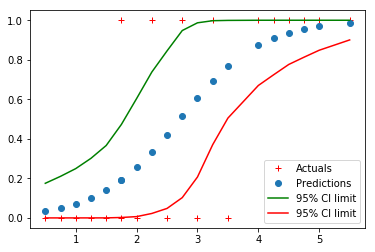

In [199]:
# Turn off statsmodels warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    x = np.array(exam['Hours'])
    X = sm.add_constant(x)
    y = exam['Pass']

    # preds holds the predictions for each sub-sample
    preds = []

    # count holds successful fit run count
    count = 0
    for trial in range(1000):

        # get sub-sample
        exam_sample = exam.sample(frac=1, replace=True)

        # fit and predict
        try:
            x_sample = np.array(exam_sample['Hours'])
            X_sample = sm.add_constant(x_sample)
            y_sample = exam_sample['Pass']
            # disp=0 will suppress suprious convergece message
            res_sample = sm.Logit(y_sample, X_sample).fit(
                disp=0
            )
            preds.append(res_sample.predict(X))
            count = count + 1
        except:
            pass
        # end try
    # end for

    print(f'{count} samples were processed')

    # get array of predictions into numpy format
    predictions_array = np.array(preds)

    _ = plt.plot(
        exam['Hours'], exam['Pass'], 'r+', label='Actuals'
    )
    _ = plt.plot(
        exam['Hours'],
        res.predict(),
        'o',
        label='Predictions',
    )
    _ = plt.plot(
        exam['Hours'],
        np.percentile(predictions_array, 97.5, axis=0),
        'g-',
        label='95% CI limit',
    )
    _ = plt.plot(
        exam['Hours'],
        np.percentile(predictions_array, 2.5, axis=0),
        'r-',
        label='95% CI limit',
    )
    _ = plt.legend(loc='lower right')

# end with

---
### An Introduction to Statistical Learning

The book _"An Introduction to Statistical Learning"_ apparently assumes the log-odds are normal.  Again, using code from the article referenced above (https://stackoverflow.com/questions/47414842/confidence-interval-of-probability-prediction-from-logistic-regression-statsmode), we get the mean, and single observation CIs

In [200]:
fit_mean = res.model.exog.dot(res.params)
fit_mean_se = (
    (
        res.model.exog
        * res.model.exog.dot(res.cov_params())
    ).sum(axis=1)
) ** 0.5
fit_obs_se = (
    (
        (res.model.endog - fit_mean).std(
            ddof=res.params.shape[0]
        )
    )
    ** 2
    + fit_mean_se ** 2
) ** 0.5

Visualizing the results

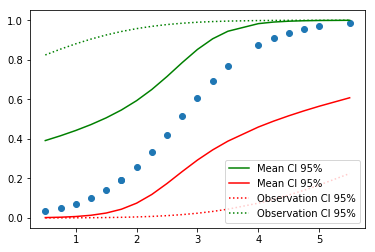

In [201]:
_ = plt.plot(x, 1 / (1 + np.exp(-fit_mean)), 'o')
_ = plt.plot(
    x,
    1 / (1 + np.exp(-fit_mean - 1.96 * fit_mean_se)),
    'g-',
    label='Mean CI 95%',
)
_ = plt.plot(
    x,
    1 / (1 + np.exp(-fit_mean + 1.96 * fit_mean_se)),
    'r-',
    label='Mean CI 95%',
)
_ = plt.plot(
    x,
    1 / (1 + np.exp(-fit_mean + 1.96 * fit_obs_se)),
    'r:',
    label='Observation CI 95%',
)
_ = plt.plot(
    x,
    1 / (1 + np.exp(-fit_mean - 1.96 * fit_obs_se)),
    'g:',
    label='Observation CI 95%',
)
_ = plt.legend(loc='lower right')

-----------
## Flu Dataset

The STATS191 lecture references a dataset, relating getting a flu shot to age, and general health awareness

### Read and Visualize  Dataset

In [202]:
flu = pd.read_fwf('../data/flu.txt', widths=[7, 7, 7])
flu.columns = ['Shot', 'Age', 'Aware']
flu.sort_values(by='Shot', inplace=True)

In [203]:
flu.head()

,Shot,Age,Aware
0,0.0,38.0,40.0
22,0.0,53.0,32.0
23,0.0,42.0,42.0
48,0.0,45.0,35.0
25,0.0,42.0,32.0


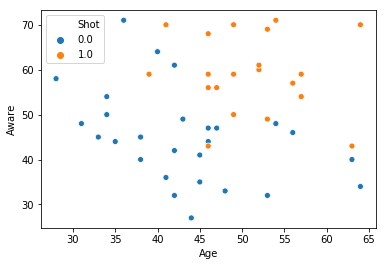

In [204]:
sn.scatterplot('Age', 'Aware', data=flu, hue='Shot')

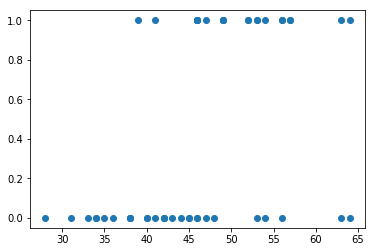

In [205]:
_ = plt.plot(flu['Age'], flu['Shot'], 'o')

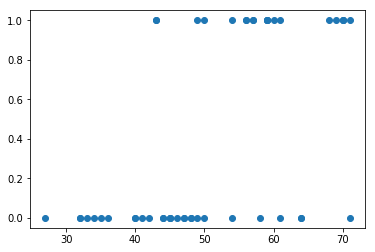

In [206]:
_ = plt.plot(flu['Aware'], flu['Shot'], 'o')

----
### Logistic Regression

In [207]:
res3 = logit('Shot ~ Age + Aware', data=flu).fit()

Optimization terminated successfully.
         Current function value: 0.324163
         Iterations 8


In [208]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Shot   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.5235
Time:                        18:49:21   Log-Likelihood:                -16.208
converged:                       True   LL-Null:                       -34.015
                                        LLR p-value:                 1.848e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.5846      6.418     -3.363      0.001     -34.164      -9.005
Age            0.2218      0.074      2.983      0.003       0.076       0.368
Aware          0.2035      0.063      3.244      0.001       0.081       0.326
==============================================================================
"""

Prediction for a 35 year old with health awareness 50 compared to a 45 year old with the same health awareness

In [209]:
examples = {'Age': [35, 45], 'Aware': [50, 50]}
res3.predict(examples)

0    0.025406
1    0.193210
dtype: float64

We can calculate the probability of a flu shot explicitly from the model parameters, and the logistic function

In [210]:
age = 35
aware = 50

prob = 1.0 / (
    1.0
    + np.exp(
        -(
            res3.params[0]
            + res3.params[1] * age
            + res3.params[2] * aware
        )
    )
)
prob

0.025405604440954365

---
### General Linear Models
It is also possible to perform a Logistic Regression via the ```statsmodels``` General Linear Model API.  Binomial here refers to the fact we have two choices of outcome.

In [211]:
res4 = glm(
    'Shot ~ Age + Aware',
    data=flu,
    family=sm.families.Binomial(),
).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Shot   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16.208
Date:                Thu, 21 May 2020   Deviance:                       32.416
Time:                        18:49:21   Pearson chi2:                     34.6
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.5846      6.418     -3.363      0.001     -34.164      -9.005
Age            0.2218      0.074      2.983      0.003       0.076       0.368
Aware          0.2035      0.063      3.244      0.001       0.081       0.326
==============================================================================
"""

Predictions are the same as previous regression

In [212]:
examples = {'Age': [35, 45], 'Aware': [50, 50]}
res3.predict(examples)

0    0.025406
1    0.193210
dtype: float64

---
### Probit Regression

We can also perform Probit Regression in two ways, via the explicit ```probit``` function, or via a GLM call

In [213]:
res5 = probit('Shot ~ Age + Aware', data=flu).fit()
res5.summary()

Optimization terminated successfully.
         Current function value: 0.320758
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   Shot   No. Observations:                   50
Model:                         Probit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.5285
Time:                        18:49:21   Log-Likelihood:                -16.038
converged:                       True   LL-Null:                       -34.015
                                        LLR p-value:                 1.559e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3504      3.284     -3.761      0.000     -18.787      -5.914
Age            0.1279      0.040      3.224      0.001       0.050       0.206
Aware          0.1164      0.033      3.568      0.000       0.052       0.180
==============================================================================
"""

To access Probit Regression via GLM, we have to specify the ```probit``` function.

To get a list of supported functions in the Bionomial family, see below (we need the second item of the supported functions list)

In [214]:
sm.families.Binomial.links

[statsmodels.genmod.families.links.logit,
 statsmodels.genmod.families.links.probit,
 statsmodels.genmod.families.links.cauchy,
 statsmodels.genmod.families.links.log,
 statsmodels.genmod.families.links.cloglog,
 statsmodels.genmod.families.links.identity]

In [215]:
res6 = glm(
    'Shot ~ Age + Aware',
    data=flu,
    family=sm.families.Binomial(
        sm.families.Binomial.links[1]
    ),
).fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Shot   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                Binomial   Df Model:                            2
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16.038
Date:                Thu, 21 May 2020   Deviance:                       32.076
Time:                        18:49:21   Pearson chi2:                     33.4
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3504      3.228     -3.826      0.000     -18.677      -6.023
Age            0.1279      0.039      3.289      0.001       0.052       0.204
Aware          0.1164      0.032      3.596      0.000       0.053       0.180
==============================================================================
"""

The two APIs give the same results

In [216]:
res5.predict(examples)

0    0.019966
1    0.218923
dtype: float64

In [217]:
res6.predict(examples)

0    0.019966
1    0.218923
dtype: float64


---------
## Reproducibility

In [218]:
%watermark -h -iv
%watermark

seaborn     0.9.0
matplotlib  3.0.2
numpy       1.15.4
statsmodels 0.9.0
pandas      1.0.0
scipy       1.1.0
host name: DESKTOP-SODFUN6
2020-05-21T18:49:21+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [219]:
sm.show_versions()


INSTALLED VERSIONS
------------------
Python: 3.7.1.final.0

Statsmodels

Installed: 0.9.0 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\statsmodels)

Required Dependencies

cython: 0.29.2 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\Cython)
numpy: 1.15.4 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\numpy)
scipy: 1.1.0 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\scipy)
pandas: 1.0.0 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\pandas)
    dateutil: 2.7.5 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\dateutil)
patsy: 0.5.1 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\patsy)

Optional Dependencies

matplotlib: 3.0.2 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\matplotlib)
    backend: module://ipykernel.pylab.backend_inline 
cvxopt: Not installed
joblib: 0.13.2 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\joblib)

Developer Tools

IPython: 7.2.0 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\IPython)
    jinja2: 2.10.1 (D:\Anaconda3\envs\ac5-py37\lib\site-packages\jinja2)
sphinx: